In [1]:
import pandas as pd
# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [2]:
file = "SaveTheEnvironment/BackEnd/data/animal/animals_by_category.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

latitude   longitude      category
0  43.804722 -115.128611  [Amphibians]
1  43.804722 -115.128611  [Amphibians]
2  43.804722 -115.128611  [Amphibians]
3  43.804722 -115.128611  [Amphibians]
4  43.804722 -115.128611  [Amphibians]

In [5]:
df.size

300006

In [6]:
df.category.unique()

array(['[Amphibians]', '[Insects]', '[Reptiles]', '[Mammals]',
       '[Mammals, Mammals]', '[Birds]', nan], dtype=object)

In [19]:
amphibians_df = df.loc[df['category'] == '[Amphibians]']
mammals_df = df.loc[(df['category'] == '[Mammals]') | (df['category'] == '[Mammals, Mammals]')]
fishes_df = df.loc[df['category'] == '[Fishes]']
birds_df = df.loc[df['category'] == '[Birds]']
reptiles_df = df.loc[df['category'] == '[Reptiles]']
insects_df = df.loc[df['category'] == '[Insects]']

mammals_df['category'] = '[Mammals]'

/var/folders/cd/637g5f7j0m30mrrmw3k25h040000gs/T/ipykernel_30270/2994061192.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mammals_df['category'] = '[Mammals]'


In [8]:
amphibians_df.head()

latitude   longitude      category
0  43.804722 -115.128611  [Amphibians]
1  43.804722 -115.128611  [Amphibians]
2  43.804722 -115.128611  [Amphibians]
3  43.804722 -115.128611  [Amphibians]
4  43.804722 -115.128611  [Amphibians]

In [9]:
amphibians_df.size + mammals_df.size + fishes_df.size + birds_df.size + reptiles_df.size + insects_df.size

300000

In [10]:
amphibians_lat_list = amphibians_df["latitude"].values.tolist()
mammals_lat_list = mammals_df["latitude"].values.tolist()
fishes_lat_list = fishes_df["latitude"].values.tolist()
birds_lat_list = birds_df["latitude"].values.tolist()
reptiles_lat_list = reptiles_df["latitude"].values.tolist()
insects_lat_list = insects_df["latitude"].values.tolist()

In [11]:
amphibians_lon_list = amphibians_df["longitude"].values.tolist()
mammals_lon_list = mammals_df["longitude"].values.tolist()
fishes_lon_list = fishes_df["longitude"].values.tolist()
birds_lon_list = birds_df["longitude"].values.tolist()
reptiles_lon_list = reptiles_df["longitude"].values.tolist()
insects_lon_list = insects_df["longitude"].values.tolist()

In [12]:
print(len(amphibians_lat_list))

93


In [13]:
print(len(amphibians_lon_list))

93


In [14]:
amphibians_df.to_csv('amphibians.csv')
mammals_df.to_csv('mammals.csv')
fishes_df.to_csv('fishes.csv')
birds_df.to_csv('birds.csv')
reptiles_df.to_csv('reptiles.csv')
insects_df.to_csv('insects.csv')

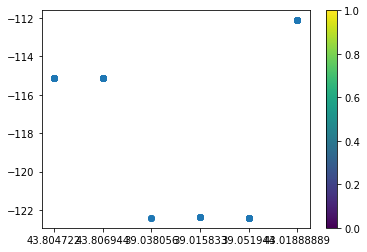

In [23]:
import matplotlib.pyplot as plt
plt.scatter(amphibians_lat_list, amphibians_lon_list)
plt.colorbar()
plt.show()

In [25]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(mammals_df['longitude'], mammals_df['latitude'])]
gdf = GeoDataFrame(mammals_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

TypeError: must be real number, not str

In [31]:
import plotly.express as px
import pandas as pd

birds_df["magnitude"] = 1

fig = px.scatter_geo(birds_df,lat='latitude',lon='longitude', hover_name="magnitude")
fig.update_layout(title = 'Mammals, 2022', title_x=0.5)
fig.show()

/var/folders/cd/637g5f7j0m30mrrmw3k25h040000gs/T/ipykernel_30270/515502565.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

